In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data_train = pd.read_csv('train.csv')

## Exploring the data

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.shape

(891, 12)

In [5]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Problem Definition

I have a training dataset with 891 samples (people) who embarked the titanic. I want to predict who is more likely to die according to the features I have about them and find some correlation with what I know.

In [6]:
# To check the missing values and data types
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing values in Age, Cabin and embarked.

In [7]:
# Info about numerical values
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data_train['PassengerId'].nunique()

891

In [9]:
data_train['Ticket'].nunique()

681

In [10]:
# Info about categorical values
data_train.describe(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
# Drop columns of unique values: not necessary for this use case
data_train.drop(columns='PassengerId', inplace=True)

# Also drop ticket number since we have information about family on board so no need to have the ticket number (almost unique)
data_train.drop(columns='Ticket', inplace=True)

#Drop Cabin since 80% missing values and out of the none missing appears at most 4 times
data_train.drop(columns='Cabin', inplace=True)

In [12]:
# Let's split into numerical and categorical features 
cat = ['Survived','Sex','Embarked','Pclass']
# Not using 'name' and'cabin' for now since almost unique, I might extract features from them
num = data_train.drop(columns=cat+['Name']).columns

### Data Distribution

C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\L E 

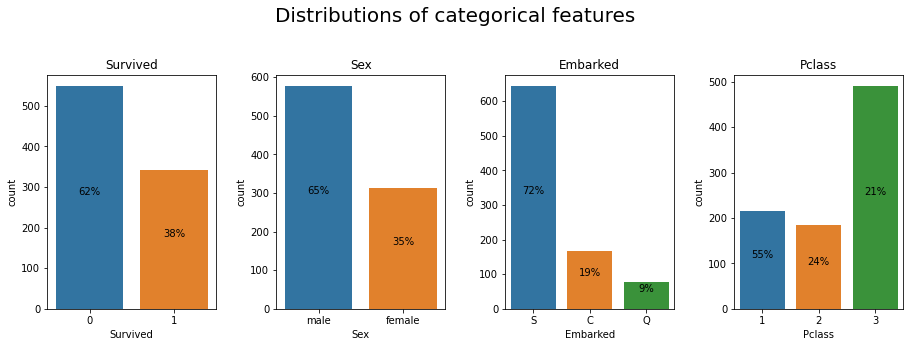

In [13]:
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Distributions of categorical features', fontsize=20)
num_cols = 4
num_rows = 1

for i, col in enumerate(cat):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    g = sns.countplot(data_train[col], ax=ax)
    ax.set_title(col)
    for j,p in enumerate(g.patches):
        g.annotate(format((data_train[col].value_counts()/data_train[col].count()).iloc[j], '.0%'), \
                   (p.get_x() + p.get_width() / 2., \
                    p.get_height()/2 -10), \
                   ha = 'center', \
                   va = 'center', \
                   xytext = (0, 10), \
                   textcoords = 'offset points')
plt.tight_layout(pad=2)

Most people in the data did not survive, the data is not toally balanced  <br>
Most are males <br>
most embarked through S <br>
Most were in class 3

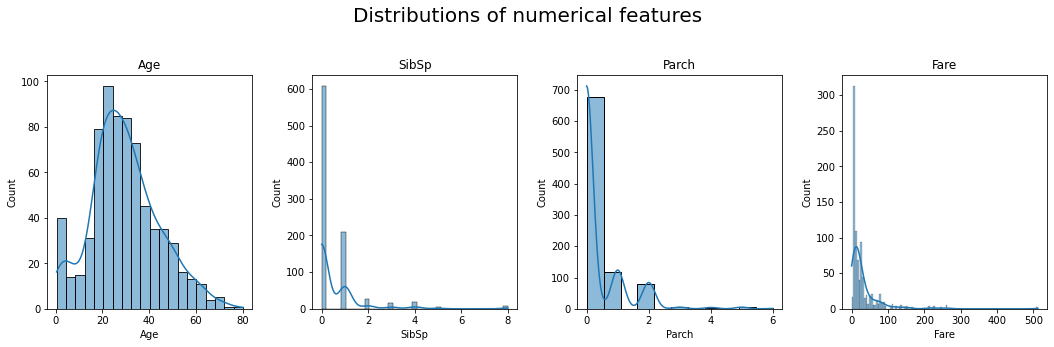

In [14]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Distributions of numerical features', fontsize=20)
num_cols = 4
num_rows = 1

for i, col in enumerate(num):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    sns.histplot(data_train[col], ax=ax, kde=True)
    ax.set_title(col)
plt.tight_layout(pad=2)


Most people in the data set are between 20 to 40 <br>
Most dont have siblings <br>
most dont have parents nor children onboard <br>
Most paid more than 0 and less than 100 (0 has to be investigated)

### Data Distribution against the dependent variable (Survived)

In [15]:
for c in cat:
    print(pd.crosstab(data_train[c],data_train['Survived']).apply(lambda x: round(x/x.sum(),2), axis=1), '\n\n')

Survived    0    1
Survived          
0         1.0  0.0
1         0.0  1.0 


Survived     0     1
Sex                 
female    0.26  0.74
male      0.81  0.19 


Survived     0     1
Embarked            
C         0.45  0.55
Q         0.61  0.39
S         0.66  0.34 


Survived     0     1
Pclass              
1         0.37  0.63
2         0.53  0.47
3         0.76  0.24 




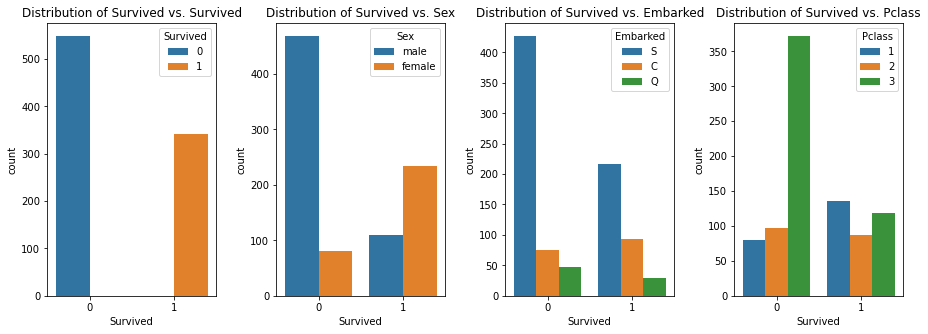

In [16]:
fig = plt.figure(figsize=(13, 5))
num_cols = 4
num_rows = 1

for i, c in enumerate(cat):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    sns.countplot(x = data_train['Survived'],  hue = data_train[c], data=data_train, ax=ax)
    ax.set_title('Distribution of Survived vs. {}'.format(c))
plt.tight_layout(pad=2)

Very interesting results: <br>
**Sex** : female have a survival rate higher than male (high correlation) <br>
**Embarked** : The distribution is not so different (no crazy results) <br>
**PClass** : Class 3 is highly correlated when not surviving anf class 1 for survived (no as hogh correlation)

In [17]:
print(pd.crosstab(data_train['SibSp'],data_train['Survived']).apply(lambda x: round(x/x.sum(),2), axis=1), '\n\n')

Survived     0     1
SibSp               
0         0.65  0.35
1         0.46  0.54
2         0.54  0.46
3         0.75  0.25
4         0.83  0.17
5         1.00  0.00
8         1.00  0.00 




In [18]:
data_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [19]:
print(pd.crosstab(data_train['Parch'],data_train['Survived']).apply(lambda x: round(x/x.sum(),2), axis=1), '\n\n')

Survived     0     1
Parch               
0         0.66  0.34
1         0.45  0.55
2         0.50  0.50
3         0.40  0.60
4         1.00  0.00
5         0.80  0.20
6         1.00  0.00 




In [20]:
data_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

We don't have so many samples when bigger family so it's hard to say there an actual correlation, we just see that when people have no family (siblings nor family) we have 65 percent who did not survive et 35 who did (for both siblings and parents). I can later feature engineer to mix those 2 features together.

In [21]:
data_train[['Age', 'Fare','Survived']].groupby('Survived').agg(['mean', 'median'])

Age              Fare       
               mean median       mean median
Survived                                    
0         30.626179   28.0  22.117887   10.5
1         28.343690   28.0  48.395408   26.0

The mean and median age are very close for survival rate. I want to find more for different age groups <br>
We can see that the people who survived have higher mean and median fare. I saw that people in first class have higher survival rate so it makes sense.

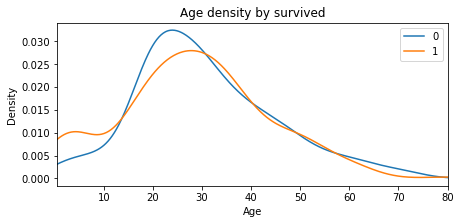

In [22]:
data_train.groupby('Survived')['Age'].plot(kind='kde', figsize=(7, 3))
plt.legend(loc = 'upper right')
plt.title('Age density by survived')
plt.xlabel('Age')
plt.xlim(data_train['Age'].min(), data_train['Age'].max())
plt.show()

We can see cuts where the density changes: <br>
Before 20 more survived <br>
Between 20 and 30 more died <br>
Between 30 and 40 a little more survived <br>
Between 60 and 80 more died but we clearly have less people. <br>
Very interesting to cut into bins according to that.

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_12268/2449149805.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.tril(np.ones_like(corr, dtype=np.bool))


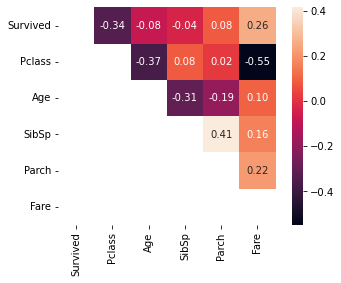

In [23]:
# Correlation between numerical values
corr = data_train.corr()
mask = np.tril(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(data_train.corr(), annot=True, fmt=".2f", mask = mask, square = True)

We have a high negative correlation between fare and Pclass (makes sense since higher the class (actually lower class: 3<1) lower fare). Still I won't remove this column since not enough correlated

In [101]:
target = 'Survived'
X = data_train.drop(columns=[target])
y = data_train[target]

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=.2,
                     random_state=42)

## None Values

In [104]:
# percentage of none values in columns containing none values
X_train.isna().sum()[X_train.isna().sum()>0]/X_train.shape[0]

Age         0.196629
Embarked    0.002809
dtype: float64

In [105]:
X_test.isna().sum()[X_test.isna().sum()>0]/X_test.shape[0]

Age    0.206704
dtype: float64

### Embarked

In [106]:
X_train[X_train['Embarked'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN
61,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN


In [107]:
100*X_train.groupby('Pclass')['Embarked'].value_counts()/X_train.groupby('Pclass')['Embarked'].count()

Pclass  Embarked
1       S           63.354037
        C           35.403727
        Q            1.242236
2       S           87.417219
        C           10.596026
        Q            1.986755
3       S           73.115578
        Q           13.819095
        C           13.065327
Name: Embarked, dtype: float64

I see that for every class most people embarked through S, so there is not so much correlation with th class since you have similar distributions (Only for class 2 where 90% embarked through S)

In [108]:
X_train.groupby('Embarked')['Fare'].agg(['mean', 'median', 'max'])

,mean,median,max
Embarked,,,
C,60.796836,27.7208,512.3292
Q,14.065487,7.7500,90.0000
S,27.805514,13.0000,263.0000


Highest fare embarked through gate C. For both of our None value we get higher fare than the mean for C so I will replace the None values by C

In [109]:
X_train['Embarked'].fillna('C', inplace=True)

C:\Users\L E N O V O\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [110]:
X_train.isna().sum()[X_train.isna().sum()>0]/X_train.shape[0]

Age    0.196629
dtype: float64

In [111]:
X_test.isna().sum()[X_test.isna().sum()>0]/X_test.shape[0]

Age    0.206704
dtype: float64

### Age

In [112]:
X_train['Age'].nunique()

83

The age was negatively correlated to the nu;ber of siblings on board.

In [113]:
X_train['SibSp'].nunique()

7

In [114]:
X_train.groupby('SibSp')['Age'].agg(['mean', 'median','min', 'max'])

,mean,median,min,max
SibSp,,,,
0,31.324652,29.0,0.42,80.0
1,29.723946,30.0,0.67,70.0
2,24.125000,24.0,0.75,53.0
3,15.300000,14.0,2.00,33.0
4,6.375000,5.5,1.00,17.0
5,10.200000,11.0,1.00,16.0
8,NaN,NaN,NaN,NaN


The median age is correlated to the number of siblings: more you have siblings younger is the median age.

In [115]:
X_train[X_train['SibSp']==8]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
324,3,"Sage, Mr. George John Jr",male,NaN,8,2,69.55,S
792,3,"Sage, Miss. Stella Anna",female,NaN,8,2,69.55,S
180,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,69.55,S
863,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.55,S
846,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,69.55,S
159,3,"Sage, Master. Thomas Henry",male,NaN,8,2,69.55,S
201,3,"Sage, Mr. Frederick",male,NaN,8,2,69.55,S


Those 8 siblings are in the same family: Sage

I will replace the None values by the median age according to the number of siblings. And when SibSp is 8 I will replace it by the minimum age (since later I will group the ages) and for higher number of siblings we can see that its in the lower group of ages.

In [116]:
X_train['Age'].fillna(X_train.groupby('SibSp')['Age'].transform('median'), inplace=True)
X_train['Age'].fillna(X_train['Age'].min(), inplace=True)

X_test['Age'].fillna(X_train.groupby('SibSp')['Age'].transform('median'), inplace=True)
X_test['Age'].fillna(X_train['Age'].min(), inplace=True)

C:\Users\L E N O V O\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [117]:
X_train.isna().sum()[X_train.isna().sum()>0]/X_train.shape[0]

Series([], dtype: float64)

In [118]:
X_test.isna().sum()[X_test.isna().sum()>0]/X_test.shape[0]

Series([], dtype: float64)

## Preprocessing

### Feature Engineering

In [119]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [120]:
pd.cut(X_train['Age'], 5)

331    (32.252, 48.168]
733    (16.336, 32.252]
382    (16.336, 32.252]
704    (16.336, 32.252]
813      (0.34, 16.336]
             ...       
106    (16.336, 32.252]
270    (16.336, 32.252]
860    (32.252, 48.168]
435      (0.34, 16.336]
102    (16.336, 32.252]
Name: Age, Length: 712, dtype: category
Categories (5, interval[float64, right]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

Separate the ages into 5 buckets : 0 : 0-16, 1 : 16-32, 2 : 32-48, 3 : 48-64, 4 : 64-80

In [121]:
def age_groups (row):
    if row['Age'] < 16:
        return 0
    elif row['Age'] < 32:
        return 1
    elif row['Age'] < 48:
        return 2
    elif row['Age'] < 64:
        return 3
    elif row['Age'] <= 80:
        return 4

In [122]:
X_train['Age_cut'] = X_train.apply(age_groups,axis=1)
X_test['Age_cut'] = X_test.apply(age_groups,axis=1)

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_12268/273064858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_cut'] = X_train.apply(age_groups,axis=1)
C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_12268/273064858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age_cut'] = X_test.apply(age_groups,axis=1)


C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_cut', ylabel='count'>

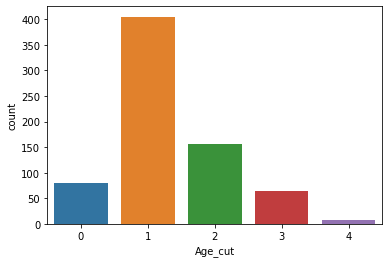

In [123]:
sns.countplot(X_train['Age_cut'])

In [124]:
X_train.drop(columns='Age', inplace=True)
X_test.drop(columns='Age', inplace=True)

C:\Users\L E N O V O\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


I will keep both columns and try a model with both separately

Extracting the titles from the names

In [125]:
import re

In [126]:
data_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

the title is always followed by a point

In [127]:
data_train['Name'].apply(lambda name: re.search('([A-Za-z]+)\.', name).group(1)).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [128]:
X_train['Title'] = X_train['Name'].apply(lambda name: re.search('([A-Za-z]+)\.', name).group(1))
X_test['Title'] = X_test['Name'].apply(lambda name: re.search('([A-Za-z]+)\.', name).group(1))

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_12268/2109560402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Title'] = X_train['Name'].apply(lambda name: re.search('([A-Za-z]+)\.', name).group(1))
C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_12268/2109560402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Title'] = X_test['Name'].apply(lambda name: re.search('([A-Za-z]+)\.', name).group(1))


In [132]:
X_train['Title'].value_counts()

Mr          419
Miss        143
Mrs          96
Master       33
Rev           5
Dr            5
Major         2
Col           2
Mlle          2
Capt          1
Mme           1
Ms            1
Countess      1
Lady          1
Name: Title, dtype: int64

In [131]:
X_train['Title'].value_counts()[X_train['Title'].value_counts().values < 9].index

Index(['Rev', 'Dr', 'Major', 'Col', 'Mlle', 'Capt', 'Mme', 'Ms', 'Countess',
       'Lady'],
      dtype='object')

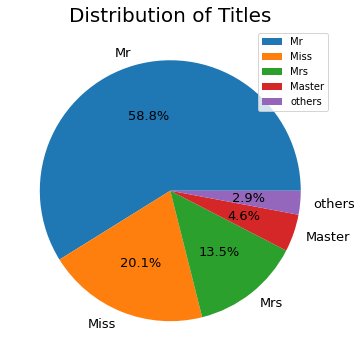

In [52]:
plt.figure(figsize=(6,6))
plt.pie(X_train['Title'].value_counts()[X_train['Title'].value_counts().values > 8].values.tolist() + [X_train['Title'].value_counts()[X_train['Title'].value_counts().values < 9].values.sum()],
        labels=X_train['Title'].value_counts()[X_train['Title'].value_counts().values > 8].index.tolist() + ['others'],
        autopct='%1.1f%%',
        textprops={'fontsize': 13})
plt.legend()
plt.title('Distribution of Titles', size=20)
plt.show()

In [53]:
# No more need of the columns name
X_train.drop(columns='Name',inplace=True)
X_test.drop(columns='Name',inplace=True)

In [54]:
X_train.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_cut',
       'Title'],
      dtype='object')

I also saw that there is not so much correlation between the survival rate and the number of family members (same for parents and siblings), only correalation when it's 0. so I create a new feature: 'family' whoch is the sum of Siblings and parents.

In [55]:
def fam_on_board(row):
    return row['SibSp'] + row['Parch']

In [56]:
X_train['family']=X_train.apply(fam_on_board, axis=1)
X_test['family']=X_test.apply(fam_on_board, axis=1)

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_12268/4223145871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['family']=X_train.apply(fam_on_board, axis=1)
C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_12268/4223145871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['family']=X_test.apply(fam_on_board, axis=1)


In [57]:
X_train.drop(columns=['SibSp','Parch'],inplace=True)
X_test.drop(columns=['SibSp','Parch'],inplace=True)

In [58]:
print(pd.crosstab(X_train['family'],y_train).apply(lambda x: round(x/x.sum(),2), axis=1), '\n\n')

Survived     0     1
family              
0         0.69  0.31
1         0.48  0.52
2         0.44  0.56
3         0.27  0.73
4         0.82  0.18
5         0.82  0.18
6         0.70  0.30
7         1.00  0.00
10        1.00  0.00 




## Preprocessing

## categorical to numerical

In [59]:
X_train.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_cut',
       'Title', 'family'],
      dtype='object')

In [60]:
X_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [61]:
X_train['Sex'] = X_train['Sex'].map({'male':0,'female':1})
X_test['Sex'] = X_test['Sex'].map({'male':0,'female':1})

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_12268/2487182611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = X_train['Sex'].map({'male':0,'female':1})
C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_12268/2487182611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sex'] = X_test['Sex'].map({'male':0,'female':1})


In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   SibSp     712 non-null    int64  
 3   Parch     712 non-null    int64  
 4   Fare      712 non-null    float64
 5   Embarked  712 non-null    object 
 6   Age_cut   712 non-null    int64  
 7   Title     712 non-null    object 
 8   family    712 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 71.8+ KB


In [63]:
X_train = pd.get_dummies(X_train, columns = ['Title', 'Embarked'])

X_test = pd.get_dummies(X_test, columns = ['Title', 'Embarked'])

In [64]:
# Need to make sure I have the same columns in test and train
cols_to_add = set(X_train.columns) - set(X_test.columns)
cols_to_del = set(X_test.columns) - set(X_train.columns)

In [65]:
cols_to_add

{'Title_Capt',
 'Title_Col',
 'Title_Countess',
 'Title_Lady',
 'Title_Major',
 'Title_Mlle',
 'Title_Mme',
 'Title_Ms'}

In [66]:
cols_to_del

{'Title_Don', 'Title_Jonkheer', 'Title_Sir'}

In [67]:
for col in cols_to_add:
    X_test[col] = 0

X_test.drop(columns=cols_to_del, inplace=True)

In [68]:
assert (X_test.columns == X_train.columns).any()

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

## Modeling

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80        91
           1       0.82      0.69      0.75        88

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.77       179
weighted avg       0.78      0.78      0.77       179



I tried different models and Random Forest with scaled data clearly gives me better results